# Project work in KIA (2024-FS)
Notebook 2: EDA </br>
Student: Vion Hasaj, hasvio01@students.zhaw.ch </br>

# Table of content

[1 Libraries and settings](#section_1)<br>
[2 Import data](#section_2)<br>
[3 EDA](#section_3)<br>


# <font color='#AAD9BB'>1 Libraries and settings </font>
<a id='section_1'></a>

In [43]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# Get current working directory
print(os.getcwd())

c:\Users\vionh\workspace\KIAProject\eda


# <font color='#AAD9BB'>2 Import data </font>
<a id='section_2'></a>

In [44]:
file_path = 'preprocessed_matches.csv'
data = pd.read_csv(file_path)

data.head()
print(data.columns)


Index(['Unnamed: 0', 'scoreLink-href', 'HTeam', 'ATeam', 'Date',
       'home_substitutions', 'away_substitutions', 'home_possession',
       'away_possession', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots_off_target', 'away_shots_off_target',
       'home_shots_outside_box', 'away_shots_outside_box',
       'home_shots_per_goal', 'away_shots_per_goal', 'home_shots_blocked',
       'away_shots_blocked', 'home_attempts_on_goal', 'away_attempts_on_goal',
       'home_saves', 'away_saves', 'home_corners', 'away_corners',
       'home_fouls', 'away_fouls', 'home_offsides', 'away_offsides',
       'home_total_passes', 'away_total_passes', 'home_accurate_passes',
       'away_accurate_passes', 'home_pass_accuracy(%)',
       'away_pass_accuracy(%)', 'Season', 'Time', 'Away', 'HG', 'AG', 'Res',
       'avg_betting_odds_home', 'avg_betting_odds_draw',
       'avg_betting_odds_away'],
      dtype='object')


# <font color='#AAD9BB'>3 EDA </font>
<a id='section_3'></a>

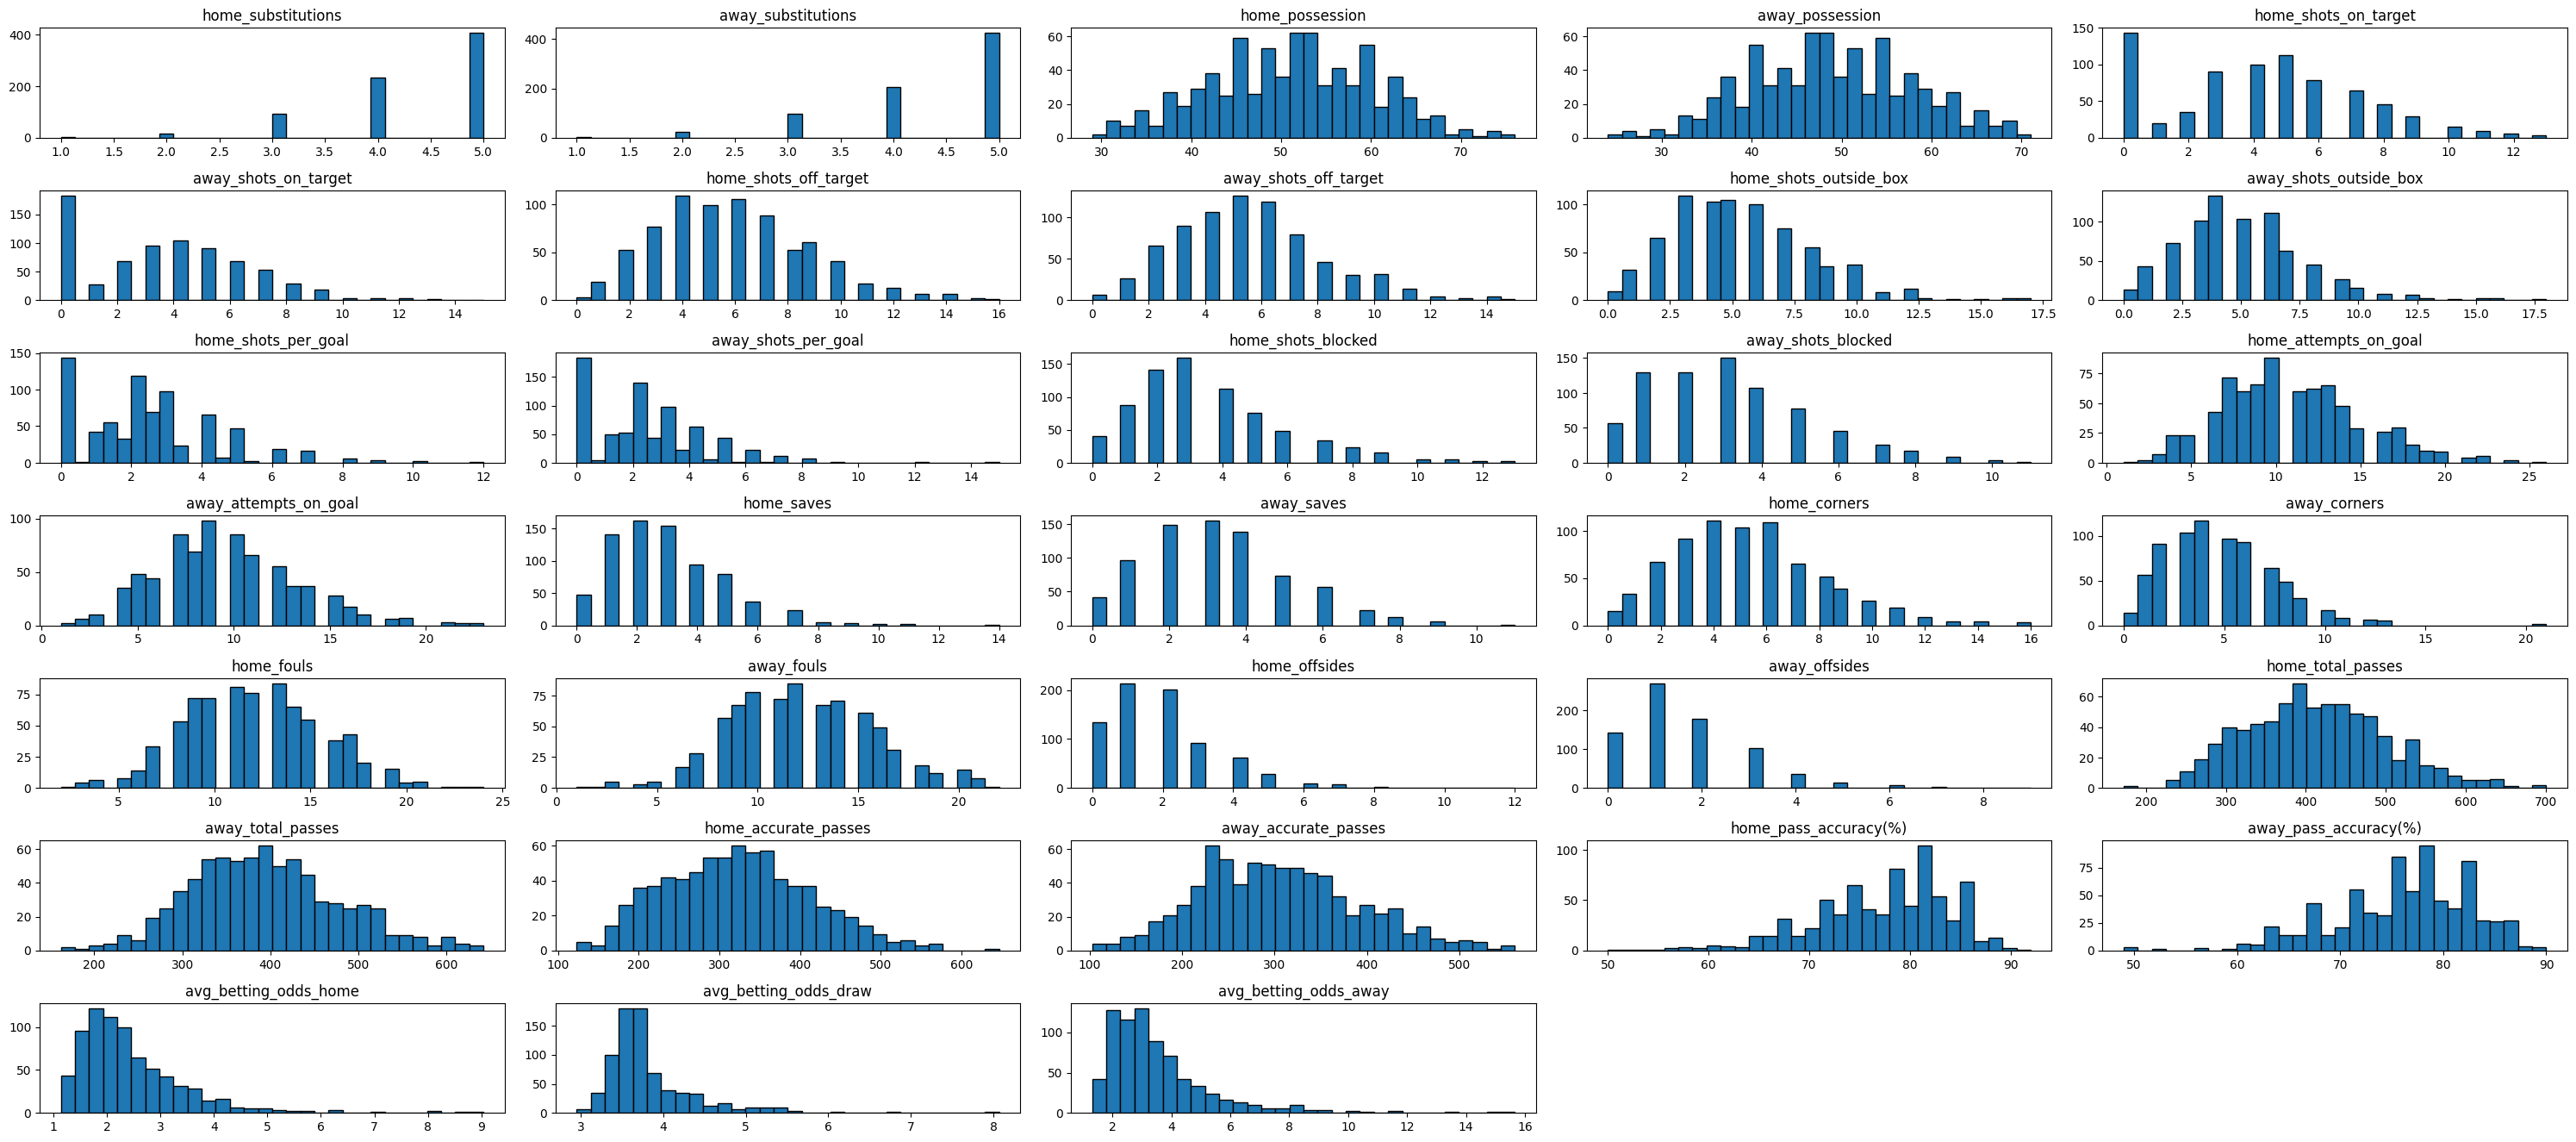

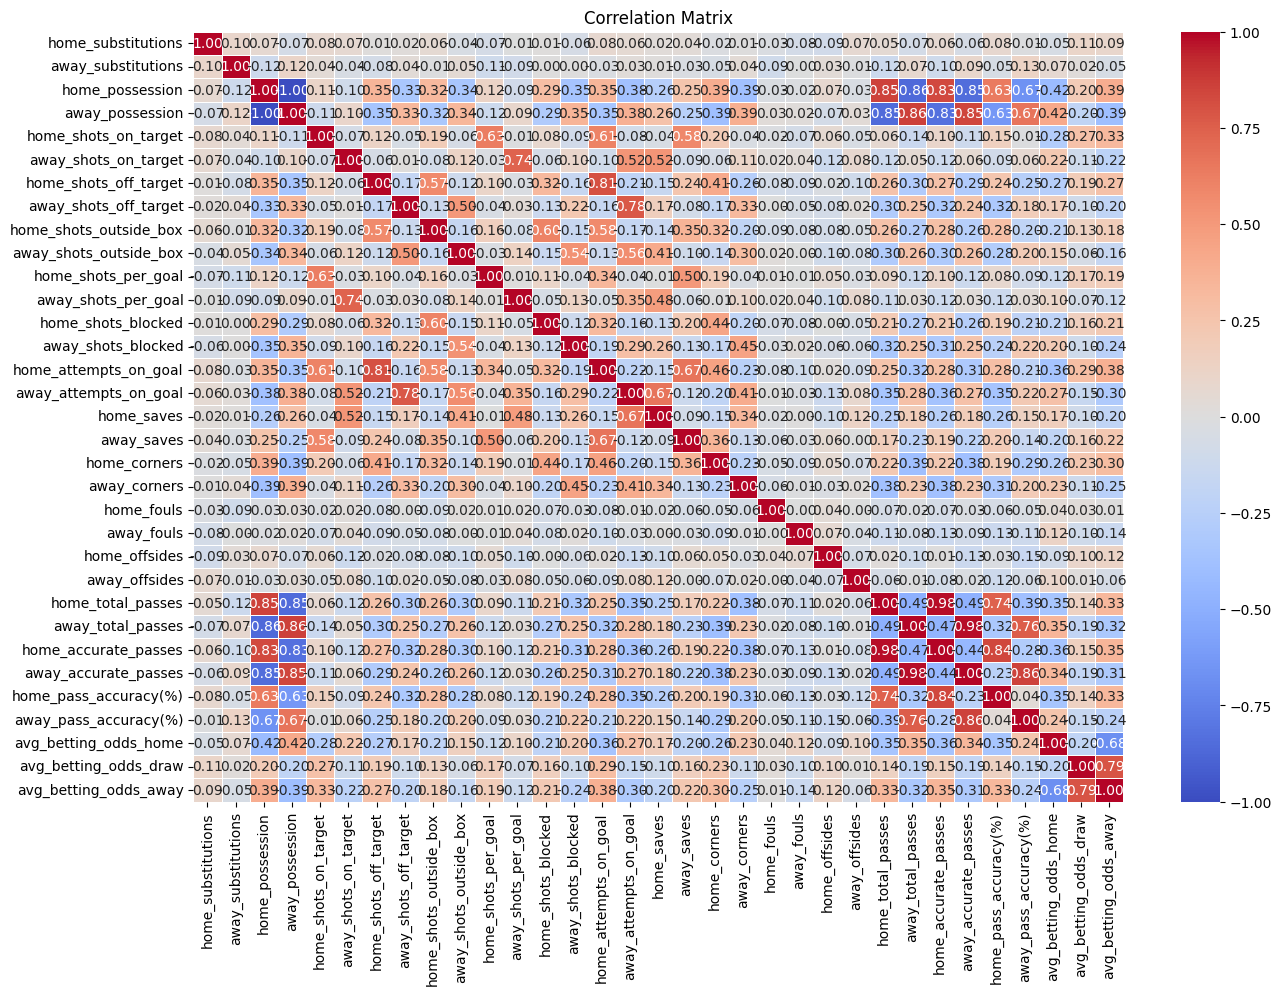

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `data` is your DataFrame

# Basic statistics
basic_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

numerical_features = [
    'home_substitutions', 'away_substitutions', 'home_possession',
       'away_possession', 'home_shots_on_target', 'away_shots_on_target',
       'home_shots_off_target', 'away_shots_off_target',
       'home_shots_outside_box', 'away_shots_outside_box',
       'home_shots_per_goal', 'away_shots_per_goal', 'home_shots_blocked',
       'away_shots_blocked', 'home_attempts_on_goal', 'away_attempts_on_goal',
       'home_saves', 'away_saves', 'home_corners', 'away_corners',
       'home_fouls', 'away_fouls', 'home_offsides', 'away_offsides',
       'home_total_passes', 'away_total_passes', 'home_accurate_passes',
       'away_accurate_passes', 'home_pass_accuracy(%)',
       'away_pass_accuracy(%)',
       'avg_betting_odds_home', 'avg_betting_odds_draw',
       'avg_betting_odds_away'
]

# Plotting histograms
plt.figure(figsize=(30, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(8, 5, i)  # Adjusted to 8 rows and 5 columns
    plt.hist(data[feature].dropna(), bins=30, edgecolor='k')
    plt.title(feature)
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[numerical_features].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The dataset consists of 752 matches.
On average, both home and away teams make around 4.37 substitutions per match.
Average home team possession is slightly higher (51.12%) compared to away team possession (48.88%).
Home teams tend to have more shots on target (4.90) and shots off target (5.95) compared to away teams (4.26 and 5.33 respectively).
The average pass accuracy is similar for both home (77.25%) and away teams (76.11%).
Home teams score an average of 1.66 goals per match, while away teams score 1.32 goals per match.

### Comparative Analysis

Comparison between away and home wins

In [46]:
# Add a column to indicate if the home team won, lost, or drew
data['home_result'] = data['Res'].apply(lambda x: 'win' if x == 'H' else ('lose' if x == 'A' else 'draw'))

# Separate the data into home wins, away wins, and draws
home_wins = data[data['home_result'] == 'win']
away_wins = data[data['home_result'] == 'lose']
draws = data[data['home_result'] == 'draw']

# Define relevant columns for analysis
relevant_columns = [
    'home_substitutions', 'away_substitutions', 'home_possession', 'away_possession',
    'home_shots_on_target', 'away_shots_on_target', 'home_shots_off_target', 'away_shots_off_target',
    'home_corners', 'away_corners', 'home_fouls', 'away_fouls', 'home_pass_accuracy(%)', 'away_pass_accuracy(%)','avg_betting_odds_home', 'avg_betting_odds_draw', 'avg_betting_odds_away'
]

# Calculate average statistics for home wins, away wins, and draws (numeric only)
average_home_wins = home_wins[relevant_columns].mean()
average_away_wins = away_wins[relevant_columns].mean()
average_draws = draws[relevant_columns].mean()

# Compile the results into a comparative dataframe
comparative_df = pd.DataFrame({
    'Home Wins': average_home_wins,
    'Away Wins': average_away_wins,
    'Draws': average_draws
})

# Display the comparative dataframe
print("Means of stats when a side won or it was a draw")
print(comparative_df)


Means of stats when a side won or it was a draw
                       Home Wins  Away Wins      Draws
home_substitutions      4.437309   4.530233   4.104762
away_substitutions      4.529052   4.320930   4.152381
home_possession        50.137615  52.074419  51.657143
away_possession        49.862385  47.925581  48.342857
home_shots_on_target    5.929664   2.209302   3.919048
away_shots_on_target    2.152905   5.395349   3.761905
home_shots_off_target   5.782875   5.846512   6.319048
away_shots_off_target   5.458716   5.116279   5.347619
home_corners            5.192661   5.465116   5.442857
away_corners            4.960245   4.590698   4.657143
home_fouls             12.091743  12.134884  11.857143
away_fouls             11.951070  12.116279  12.495238
home_pass_accuracy(%)  77.079511  77.911628  76.852381
away_pass_accuracy(%)  76.862385  75.902326  75.138095
avg_betting_odds_home   2.161376   2.794605   2.503333
avg_betting_odds_draw   3.967554   3.691674   3.793333
avg_betting_odds_

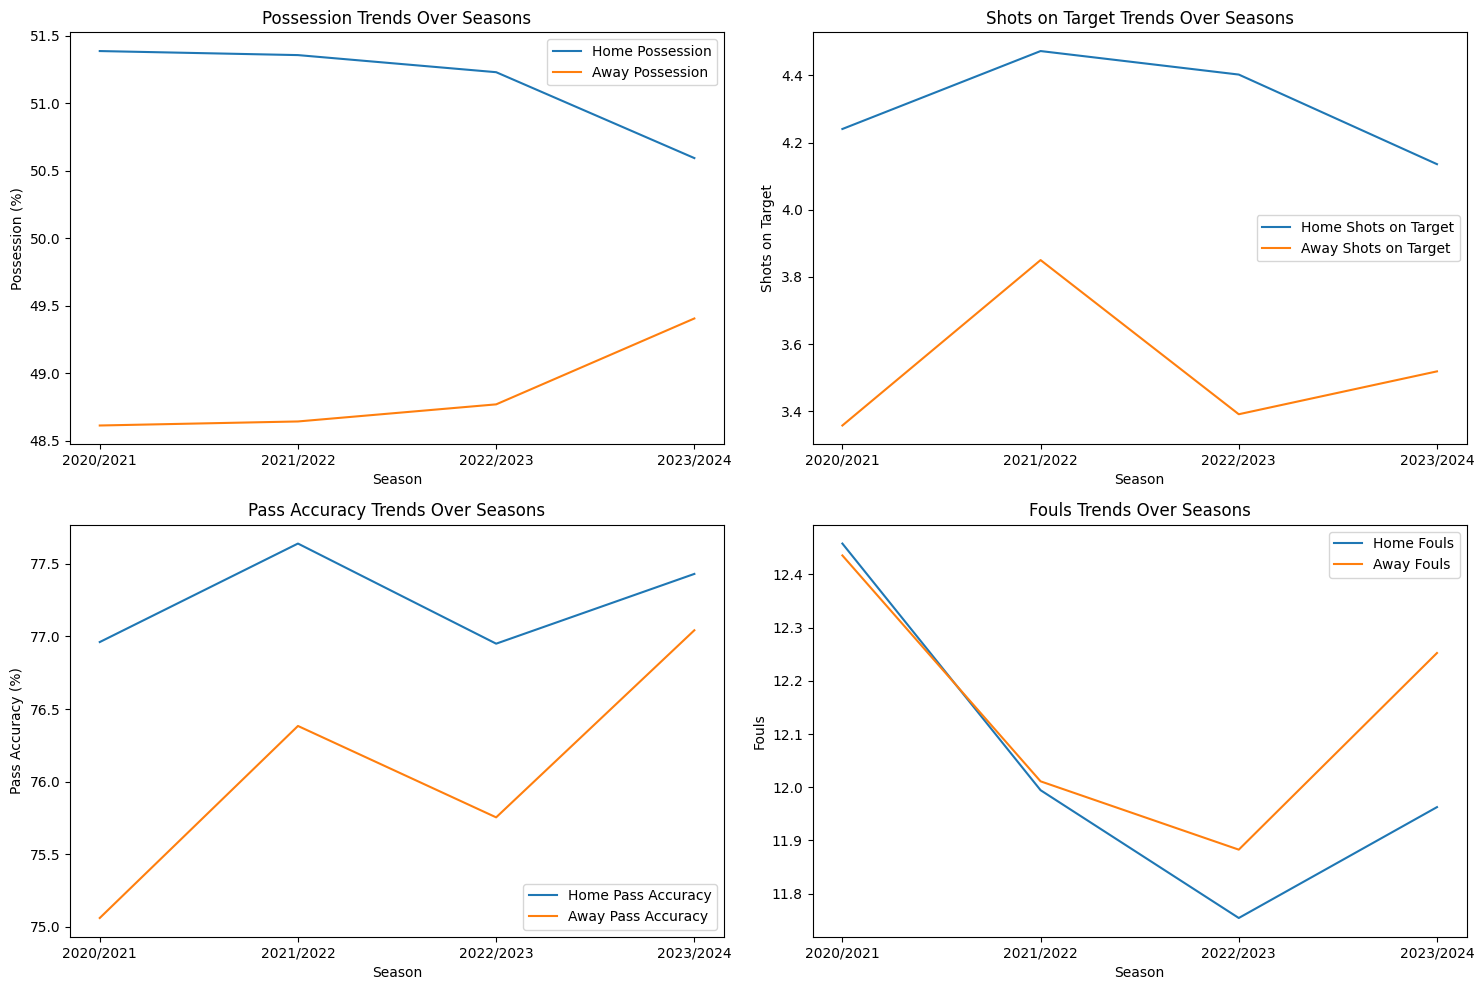

In [47]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Group by Season and calculate mean of relevant statistics
seasonal_stats = data.groupby('Season')[relevant_columns].mean()

# Plotting time-based trends for selected statistics
plt.figure(figsize=(15, 10))

# Plotting possession trends
plt.subplot(2, 2, 1)
plt.plot(seasonal_stats.index, seasonal_stats['home_possession'], label='Home Possession')
plt.plot(seasonal_stats.index, seasonal_stats['away_possession'], label='Away Possession')
plt.xlabel('Season')
plt.ylabel('Possession (%)')
plt.title('Possession Trends Over Seasons')
plt.legend()

# Plotting shots on target trends
plt.subplot(2, 2, 2)
plt.plot(seasonal_stats.index, seasonal_stats['home_shots_on_target'], label='Home Shots on Target')
plt.plot(seasonal_stats.index, seasonal_stats['away_shots_on_target'], label='Away Shots on Target')
plt.xlabel('Season')
plt.ylabel('Shots on Target')
plt.title('Shots on Target Trends Over Seasons')
plt.legend()

# Plotting pass accuracy trends
plt.subplot(2, 2, 3)
plt.plot(seasonal_stats.index, seasonal_stats['home_pass_accuracy(%)'], label='Home Pass Accuracy')
plt.plot(seasonal_stats.index, seasonal_stats['away_pass_accuracy(%)'], label='Away Pass Accuracy')
plt.xlabel('Season')
plt.ylabel('Pass Accuracy (%)')
plt.title('Pass Accuracy Trends Over Seasons')
plt.legend()

# Plotting fouls trends
plt.subplot(2, 2, 4)
plt.plot(seasonal_stats.index, seasonal_stats['home_fouls'], label='Home Fouls')
plt.plot(seasonal_stats.index, seasonal_stats['away_fouls'], label='Away Fouls')
plt.xlabel('Season')
plt.ylabel('Fouls')
plt.title('Fouls Trends Over Seasons')
plt.legend()

plt.tight_layout()
plt.show()

Possession trends might show changes in team strategies.
Shot accuracy and pass accuracy could indicate improvements in team performance.
Fouls and corners might reveal changes in gameplay intensity.